In [1]:
# Useful for debugging
%load_ext autoreload
%autoreload 2

# pySuperfish Poisson example

This example should run on Linux, macOS, and Windows

In [2]:
from superfish import Superfish

In [3]:
# by default, will try to use the private container hhslepicka/poisson-superfish:latest
# see https://github.com/hhslepicka/docker-poisson-superfish-nobin for instructions
# on building and using your own docker container
Superfish._container_image = "poisson-superfish"

In [4]:
import os
AMFILE = os.path.join('data', 'solenoid.am')
assert os.path.exists(AMFILE)

In [5]:
# by default, will auto-detect system and use a container on macOS, or no container on (native) Windows
SF = Superfish(AMFILE, problem='poisson', verbose=True)

# On Windows Subsystem for Linux (WSL), if you want to run this notebook on Linux but
# have PySuperfish use the Windows executables, you can do this instead:
#SF = Superfish(AMFILE, problem='poisson', verbose=True, use_container=False)
#Superfish._windows_exe_path = '/mnt/c/LANL/'

Configured to run in: /tmp/tmpslpp806s
Using container on Linux:
     docker run {interactive_flags} --rm -v {local_path}:/data/ {image} {cmds}


In [6]:
# Run, should take about a minute
SF.run()

Running: docker run  --rm -v /tmp/tmpslpp806s:/data/ poisson-superfish automesh SOLENOID.AM
Running: docker run  --rm -v /tmp/tmpslpp806s:/data/ poisson-superfish poisson
Running: docker run  --rm -v /tmp/tmpslpp806s:/data/ poisson-superfish sfo
Done in      39.14 seconds
Parsed output: /tmp/tmpslpp806s/SOLENOID.SFO


In [7]:
# This is automatically done above
SF.load_output()

Parsed output: /tmp/tmpslpp806s/SOLENOID.SFO


# SFO Output

In [8]:
SF.output.keys()

dict_keys(['sfo'])

In [9]:
SF.output['sfo'].keys()

dict_keys(['wall_segments', 'other', 'header'])

In [10]:
# Readback of the basic parameters, with the description
header = SF.output['sfo']['header']
for key in header['variable']:
    print(f"{key:10} {header['variable'][key]:16} {header['description'][key]}")

ANGLE                   0.0 Extent of arc for interpolating potential
ANGLZ                   0.0 Initial point on arc for interpolation
CLIGHT        29979245800.0 Exact speed of light in cm/sec
CONV                    1.0 Length conversion (number of units per cm)
DIAGDLL                   0 If 1, DLL writes diagnostics to DiagDLL.txt
DX1                     0.1 First X mesh interval (at XMIN)
DXMIN                   0.1 Minimum X mesh interval (found by Automesh)
DYMIN         0.08665511265 Minimum Y mesh interval (found by Automesh)
EPS0        8.854187818e-12 Permittivity of free space
EPSILA                5e-07 Convergence PARAMETER: air, interface points
EPSILI                5e-07 Convergence parameter for iron points
EPSO                  1e-05 Convergence parameter in mesh optimization
ETAAIR          0.987808462 Rate of convergence in air, cycle N
ETAFE           0.989365314 Rate of convergence in iron, cycle N
FIXEPS                  9.0 Permittivity when MODE=-1
FIXGAM   

# Plot

In [11]:
# Nicer plotting
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

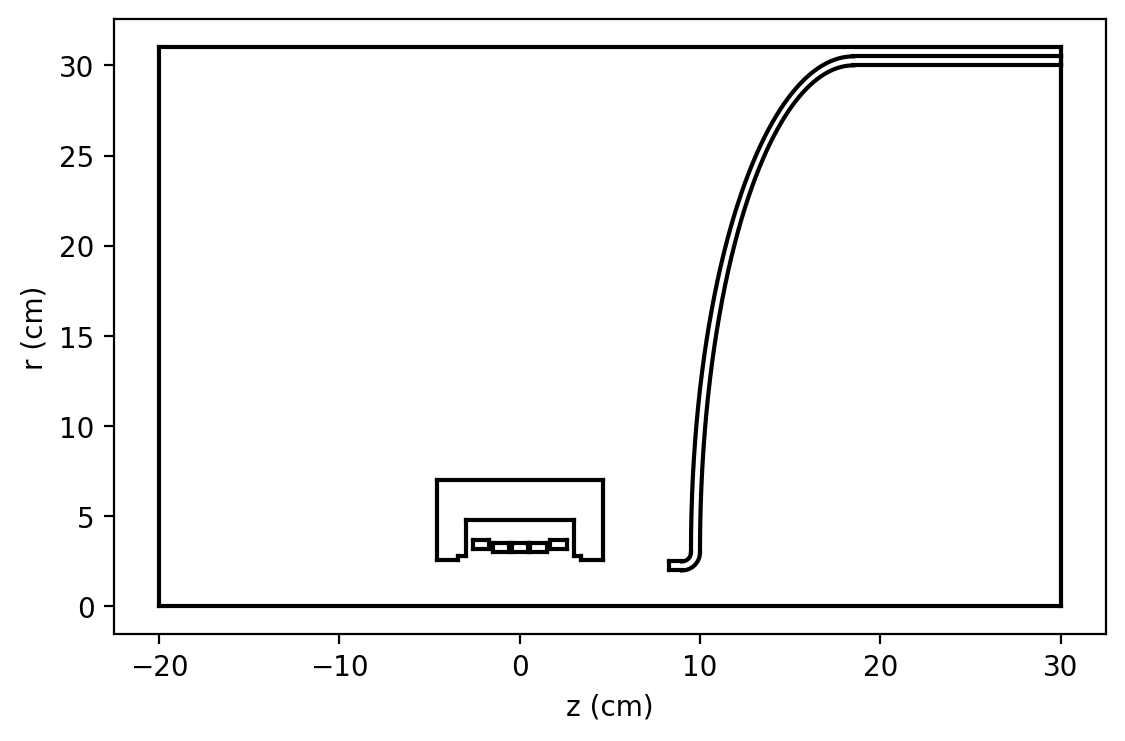

In [12]:
SF.plot_wall(field='B')

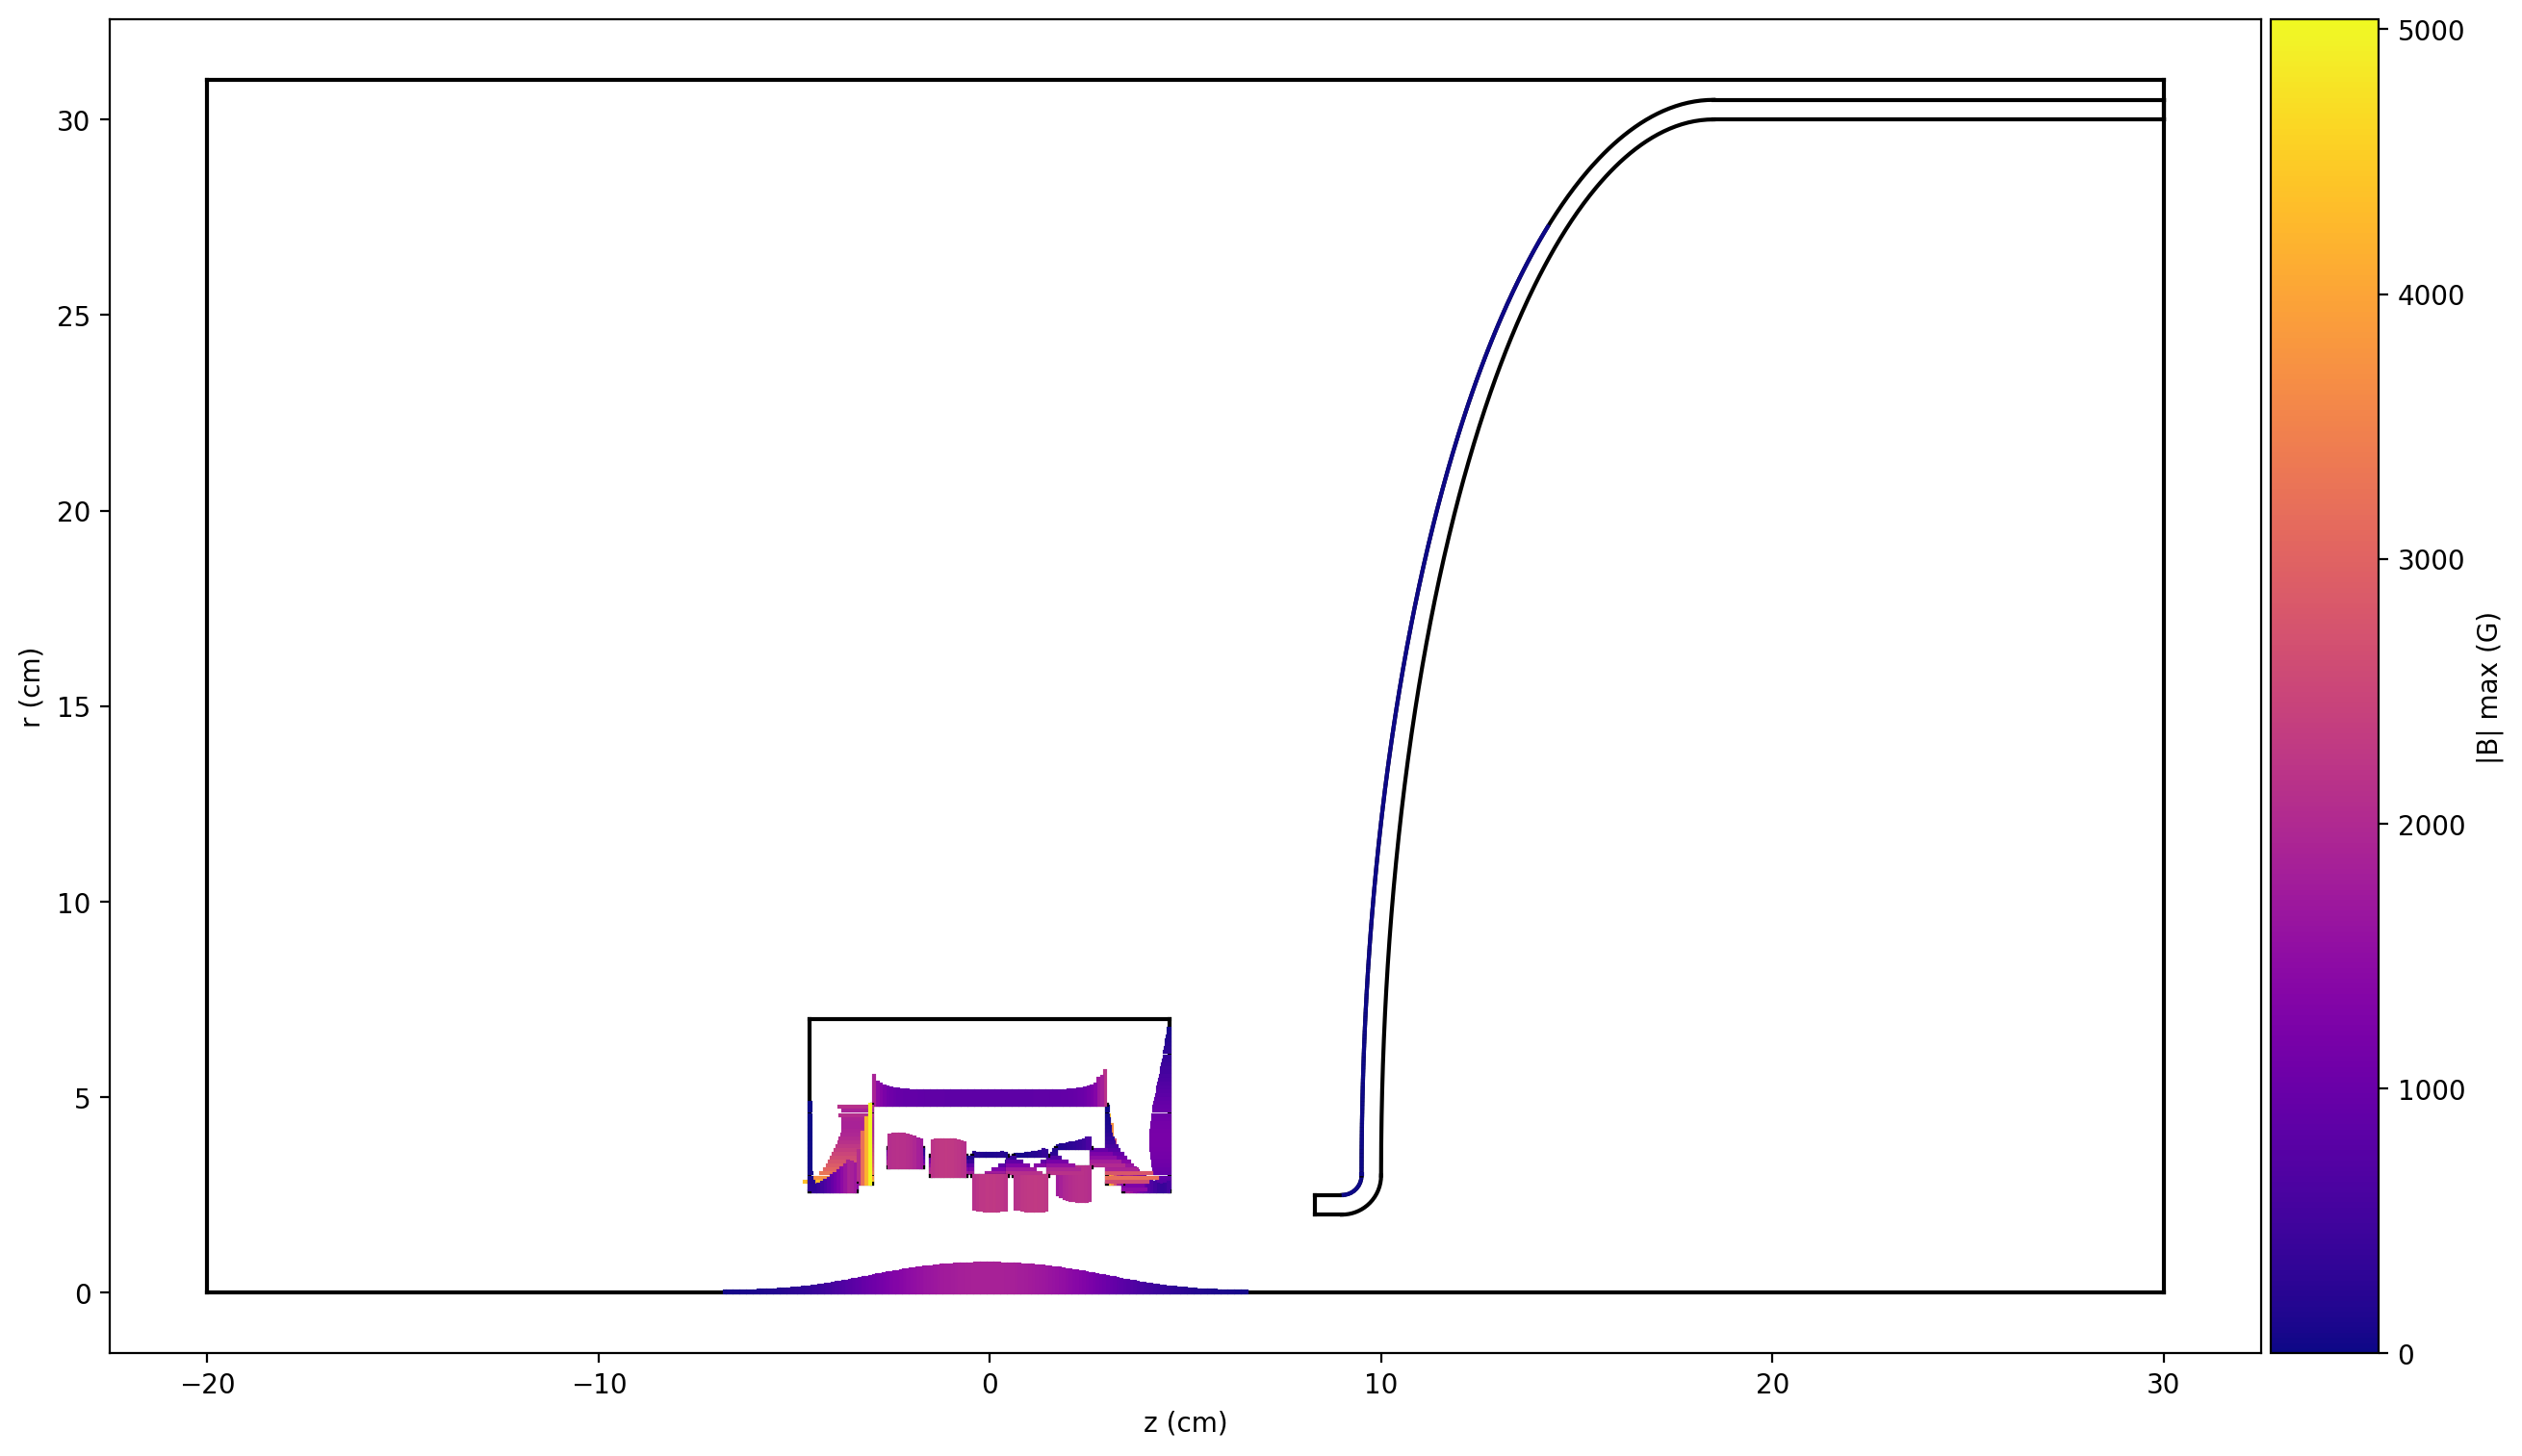

In [13]:
SF.plot_wall(perp_scale=2, field='B', figsize=(16,9))

# Interpolate

In [14]:
?SF.interpolate

Signature: SF.interpolate(zmin=-1000, zmax=1000, nz=100, rmin=0, rmax=0, nr=1)
Docstring: Interpolates field over a grid. 
File:      ~/github/PySuperfish/superfish/superfish.py
Type:      method

In [15]:
# Get the data
t7data = SF.interpolate(zmin=-10, zmax = 10, rmax = 10, nz=201, nr=101)

t7data.keys()

Running: docker run  --rm -v /tmp/tmpslpp806s:/data/ poisson-superfish sf7 SOLENOID.IN7 SOLENOID.T35


dict_keys(['geometry', 'problem', 'rmin', 'rmax', 'nr', 'zmin', 'zmax', 'nz', 'Br', 'Bz'])

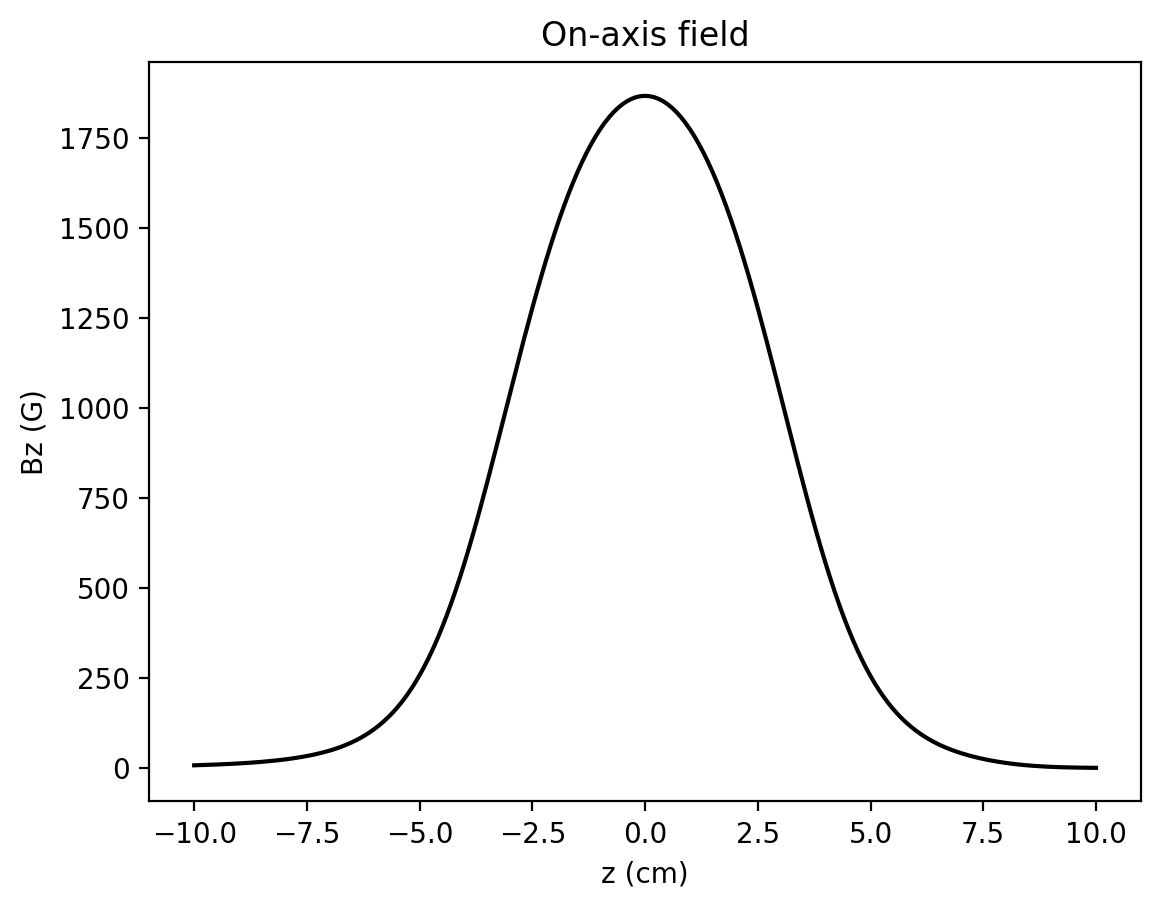

In [16]:
from superfish import plot
import numpy as np

z = np.linspace(t7data['zmin'], t7data['zmax'], t7data['nz'])
Bz = t7data['Bz'][0, :]

plt.title('On-axis field')
plt.xlabel('z (cm)')
plt.ylabel('Bz (G)')
plt.plot(z, Bz, color='black')

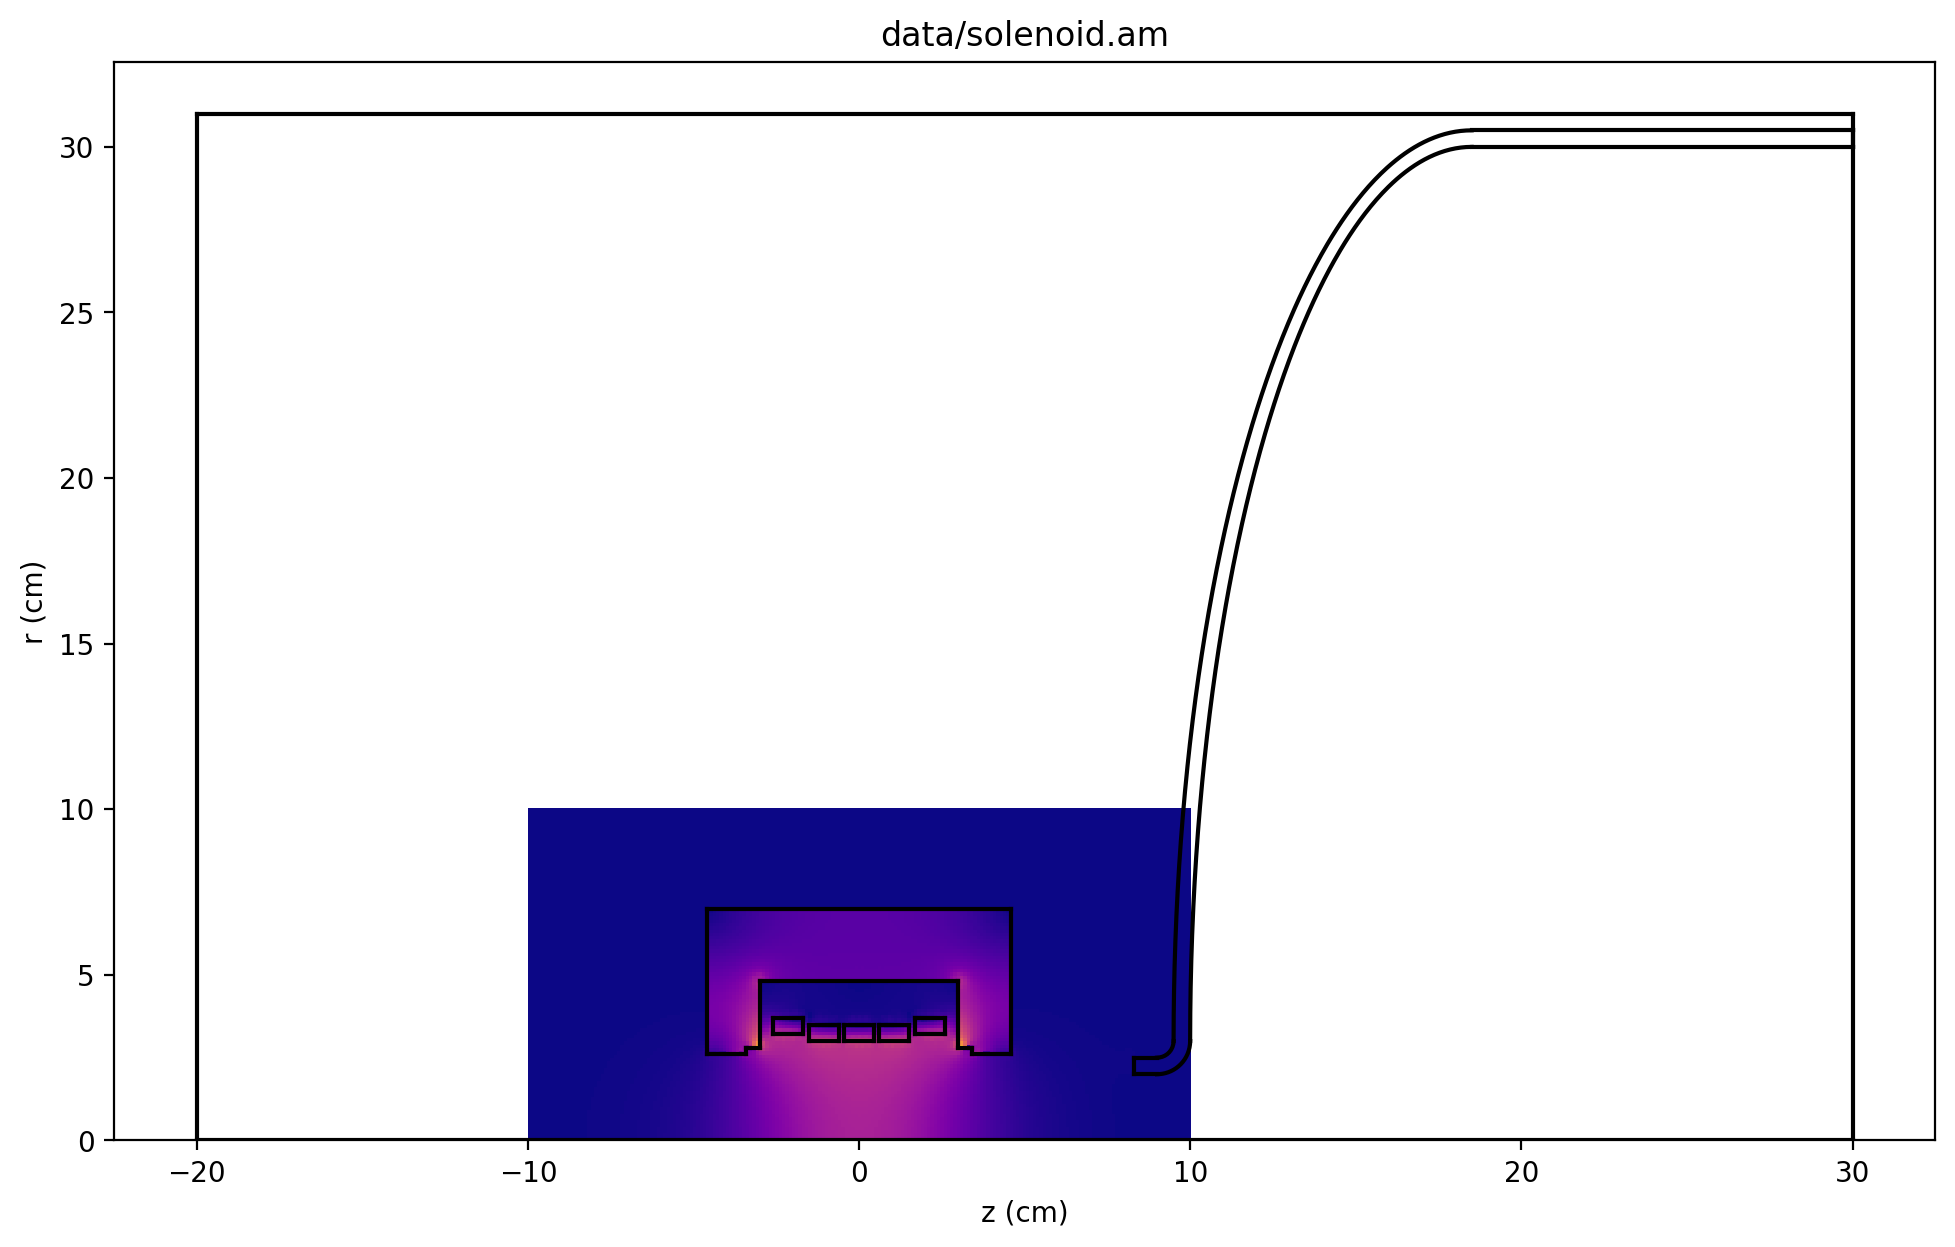

In [17]:
# Plot field data
fig, ax = plt.subplots(figsize=(12,7))

ax.set_title(AMFILE)

plot.add_t7data_to_axes(t7data, ax, field='B', vmin=None)

plot.plot_wall(SF.output['sfo']['wall_segments'], ax=ax)


In [17]:
# Use this as the example data
#!cp {SF.path}/*T7 data/SOLENOID.T7

# Interactive

You can use Superfish's own graphical tools (when running in a container) with the interactive flag (currently, only supported on macOS).


In [18]:
SF.interactive = True


# This will pop up the WSFPLOT.EXE window.
SF.run_cmd('wsfplot')

Running: /mnt/c/LANL/WSFPLOT.EXE


CompletedProcess(args=['/mnt/c/LANL/WSFPLOT.EXE'], returncode=0)